In [2]:
from music21 import midi
import numpy as np
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

from visual_midi import Plotter
from visual_midi import Preset
from pretty_midi import PrettyMIDI

import glob
import os
import subprocess
import math
from IPython.display import Image, display

def parenthetic_contents(string):
    """Generate parenthesized contents in string as pairs (level, contents)."""
    stack = []
    for i, c in enumerate(string):
        if c == '(':
            stack.append(i)
        elif c == ')' and stack:
            start = stack.pop()
            if len(stack)==1:
                yield (len(stack), string[start + 1: i])
def get_feature(mid_file, long_short_threshold = 16):
    #print("processing",mid_file)
    try:
        out = subprocess.run(["java", "-jar","omnisia.jar","-i",mid_file,"-draw"],stdout=subprocess.PIPE, stderr=subprocess.PIPE, timeout= 30)
    except :
        print("item is probably empty return 1, 0 , 0 False")
        return 1, 0, 0, False
    txt = out.stdout.decode('utf-8')
    log_folder = txt.split("\n")[5].split(":")[-1][1:]
    cos_file = glob.glob(log_folder+"/*.cos")[0]
    if not os.path.isfile(cos_file):
        print("cos file doesn't exist")
        return 1, 0, 0, False
    """png_file = glob.glob(log_folder+"/*.png")[0]
    if not os.path.isfile(png_file):
        print("png file doesn't exist")
        return 1, 0, 0, False"""
    ratio = None
    file_lst_with_long_pattern = []
    with open(cos_file, "r") as f:
        lines = f.readlines()
        ratio = [float(line.split(" ")[-1]) for line in lines if line.startswith("compressionRatio ")][0]
        if math.isnan(ratio):
            ratio = 1
        pattern_occurence = [(list(parenthetic_contents(line))[0][1], list(parenthetic_contents(line))[1][1].count("v")) for line in lines if line.startswith("T")]
        #span: number of 16th notes 220:16th note, 880: 1/4note, 3520: 1note
        span_occurence = [(  (float(p_o[0].split("p")[-1].split(",")[0][1:])- float(p_o[0].split("p")[1].split(",")[0][1:]))/220
                              ,p_o[1]
                          ) for p_o in pattern_occurence if p_o[1]!=1]
        num_long_pattern= sum([x[1] for x in span_occurence if x[0]>=long_short_threshold])
        if num_long_pattern>0:
            print("long pattern exists",mid_file) #_eva.mid
            mid_file_with_chord = mid_file[:-8]+".mid"
            #playmid(mid_file)
            playmid(mid_file_with_chord)
            #loadimg(png_file)
            current_file_has_long_pattern = True
        else:
            current_file_has_long_pattern = False
            subprocess.run(["rm", "-rf",log_folder])
        num_short_pattern = sum([x[1] for x in span_occurence if x[0]<long_short_threshold])
        
    #print(ratio)
    return ratio, num_long_pattern, num_short_pattern, current_file_has_long_pattern

def playmid(mid_file):
    f = midi.MidiFile()
    f.open(mid_file)
    f.read()
    f.close()
    s = midi.translate.midiFileToStream(f)
    '''preset = Preset(plot_width=850)
    plotter = Plotter(preset, plot_max_length_bar=4)
    pm = PrettyMIDI(mid_file)
    plotter.show_notebook(pm) '''
    it_pianoroll = Multitrack(mid_file)
    it_pianoroll.parse_pretty_midi(PrettyMIDI(mid_file),algorithm='custom', first_beat_time=0.0)
    fig, axs = it_pianoroll.plot()
    plt.show()

    s.show("midi")
def loadimg(path):
    
    display(Image(filename=path) )


long pattern exists test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_13_39_33_Electronic_nosamplernn_120000_16_0.6_0.6_m_michael-walthius_dreaming-in-stereo---under-the-moon_pre-chorus_chorus_solo_instrumental_eva.mid


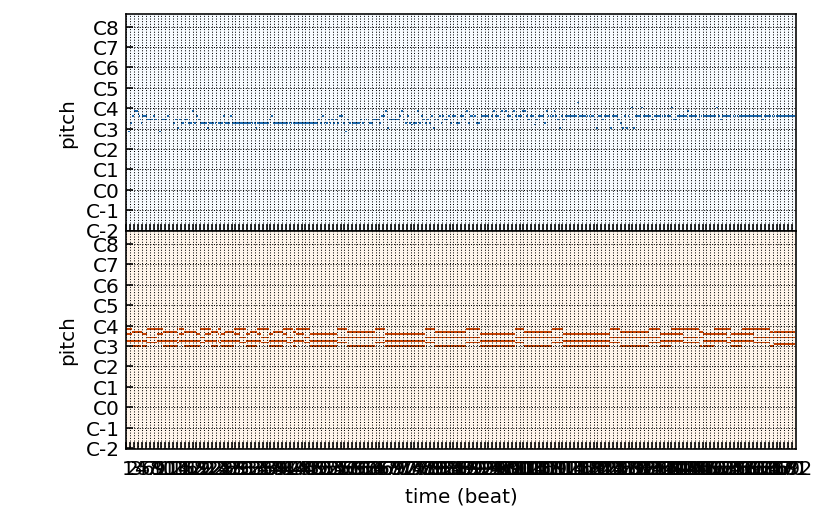

long pattern exists test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_13_39_33_Electronic_nosamplernn_120000_16_0.6_0.6_t_tristam_my-friend_pre-chorus_chorus_bridge_eva.mid


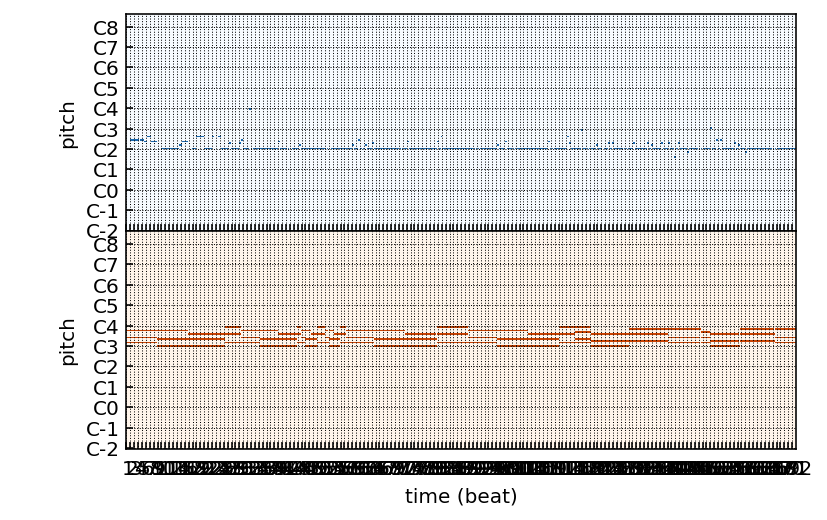

long pattern exists test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_13_39_33_Electronic_nosamplernn_120000_16_0.6_0.6_l_lady-gaga_so-happy-i-could-die_verse-and-pre-chorus_chorus_eva.mid


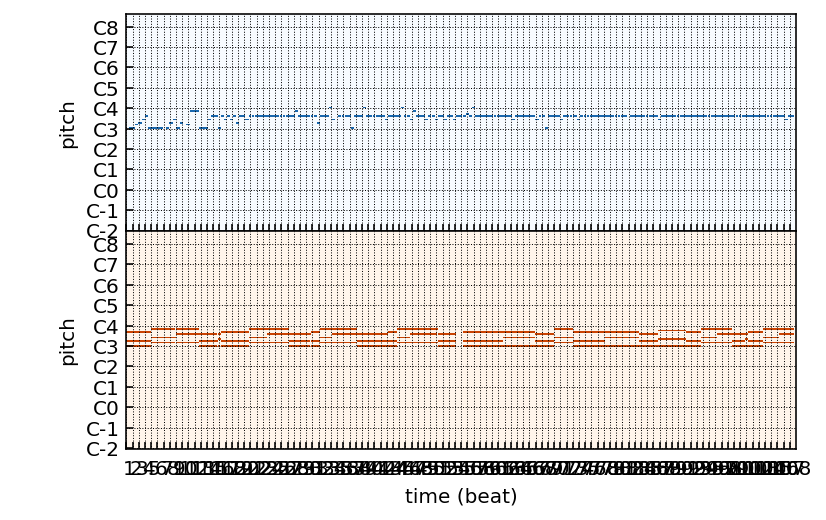

long pattern exists test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_13_39_33_Electronic_nosamplernn_120000_16_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


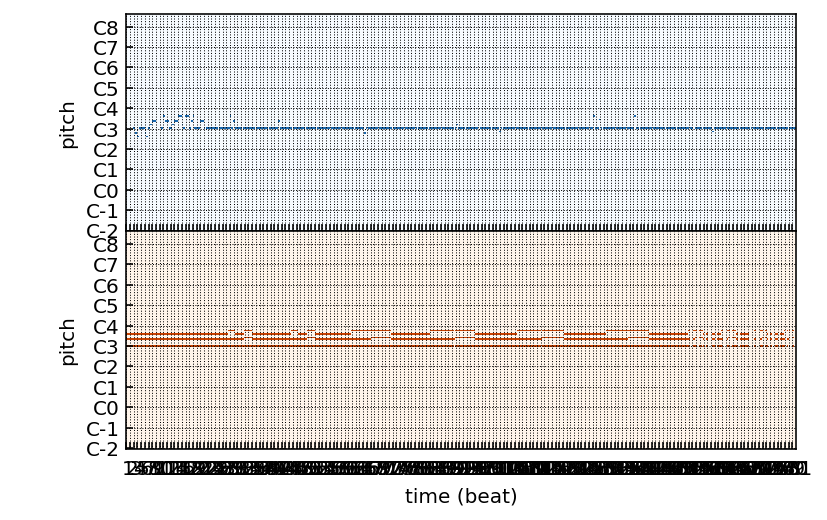

long pattern exists test/generated_result/10_24_2020_17_41_20_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_41_20_Electronic_nosamplernn_120000_16_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


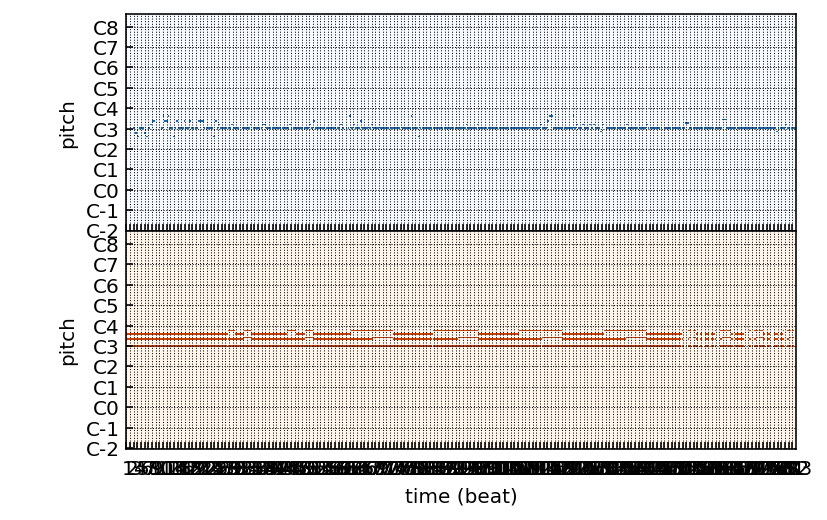

long pattern exists test/generated_result/10_24_2020_17_41_20_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_41_20_Electronic_nosamplernn_120000_16_0.6_0.6_m_michael-walthius_dreaming-in-stereo---under-the-moon_pre-chorus_chorus_solo_instrumental_eva.mid


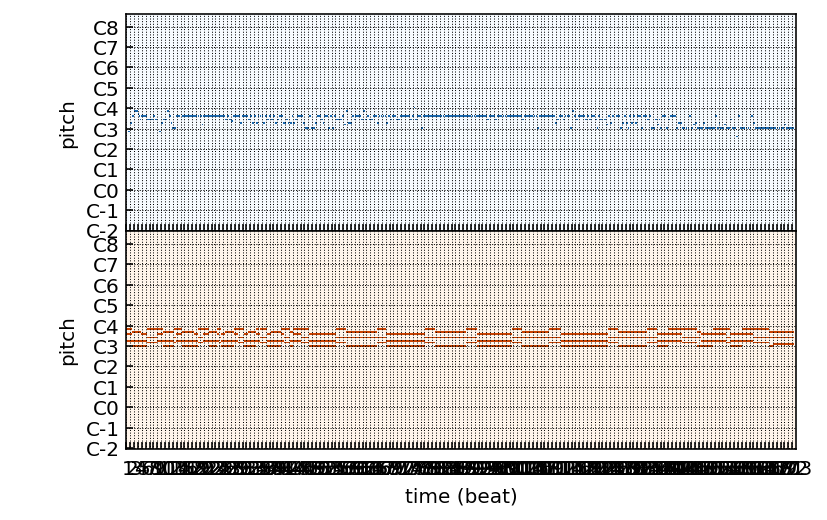

long pattern exists test/generated_result/10_24_2020_17_42_00_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_42_00_Electronic_nosamplernn_120000_16_0.6_0.6_n_nicki-minaj_va-va-voom_verse-and-pre-chorus_chorus_bridge_eva.mid


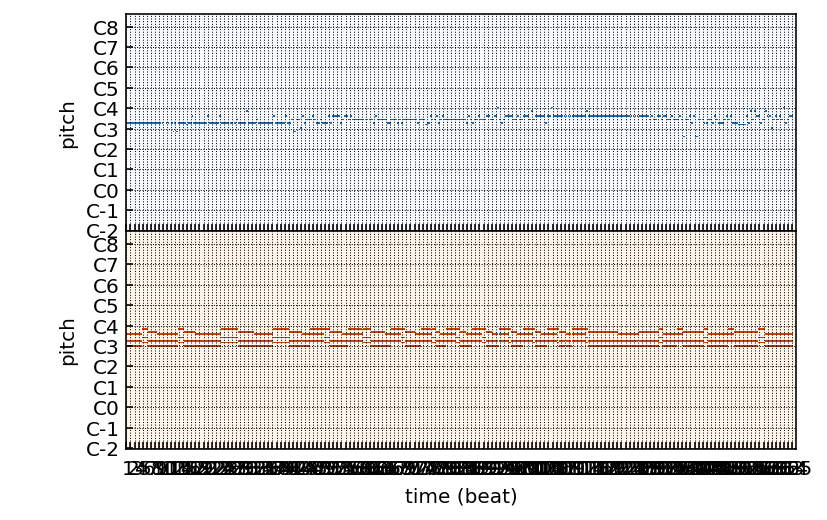

long pattern exists test/generated_result/10_24_2020_17_45_04_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_45_04_Electronic_nosamplernn_120000_16_0.6_0.6_l_lindsey-stirling_heist_verse_chorus_eva.mid


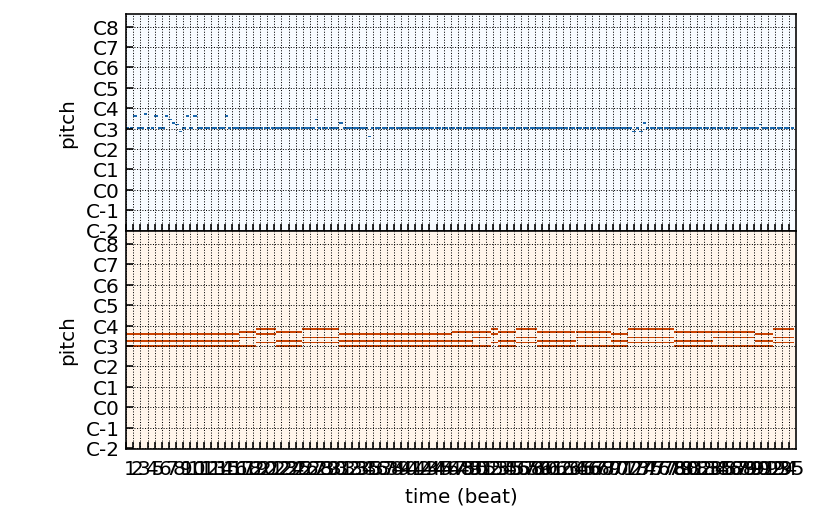

long pattern exists test/generated_result/10_24_2020_17_49_44_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_49_44_Electronic_nosamplernn_120000_16_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


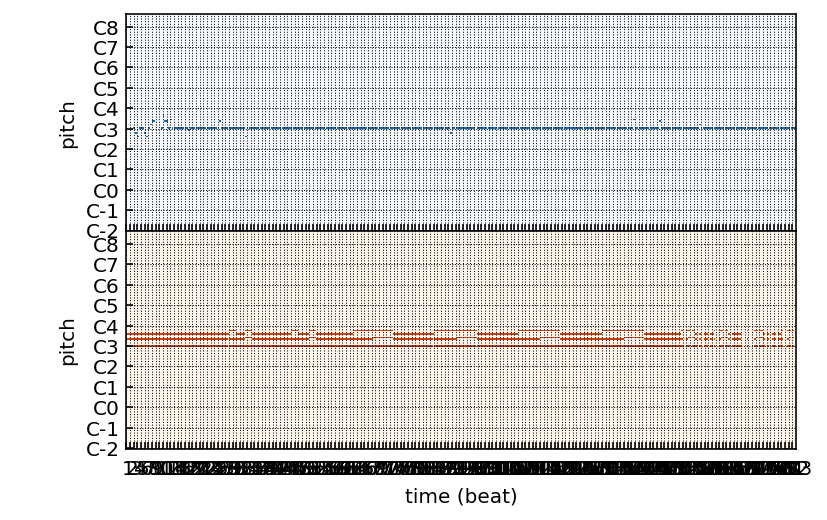

long pattern exists test/generated_result/10_24_2020_17_49_44_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_49_44_Electronic_nosamplernn_120000_16_0.6_0.6_t_tristam_my-friend_pre-chorus_chorus_bridge_eva.mid


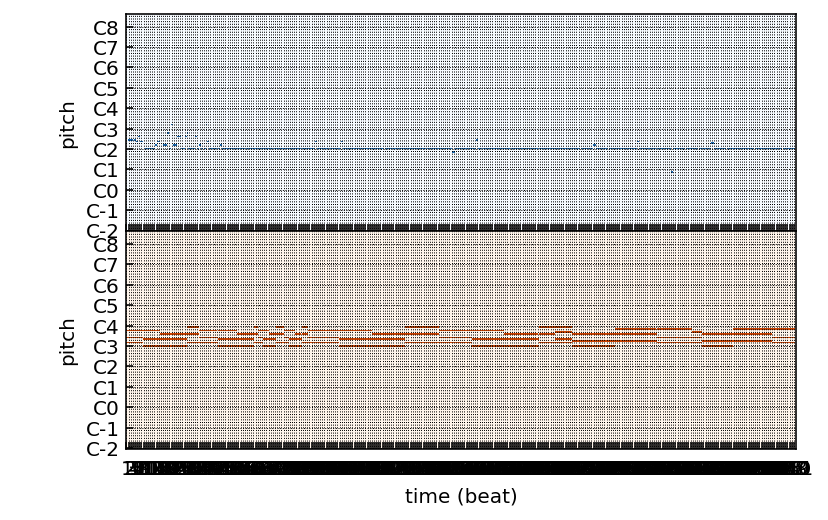

long pattern exists test/generated_result/10_24_2020_17_49_44_Electronic_nosamplernn/120000/16/0.6_0.6/10_24_2020_17_49_44_Electronic_nosamplernn_120000_16_0.6_0.6_n_nicki-minaj_va-va-voom_verse-and-pre-chorus_chorus_bridge_eva.mid


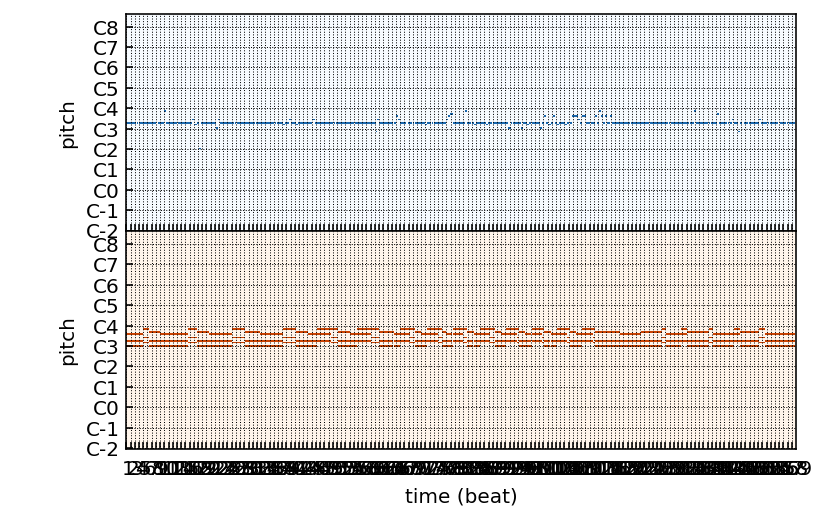

In [3]:
#folders_2b_evalutated = ["./test/generated_result/10_26_2020_11_14_22_Electronic_note/120000/8/0.7_0.8", "test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6"]
folders_2b_evaluated = ["test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6",
                       "test/generated_result/10_24_2020_17_41_20_Electronic_nosamplernn/120000/16/0.6_0.6",
                       "test/generated_result/10_24_2020_17_42_00_Electronic_nosamplernn/120000/16/0.6_0.6",
                       "test/generated_result/10_24_2020_17_45_04_Electronic_nosamplernn/120000/16/0.6_0.6",
                       "test/generated_result/10_24_2020_17_49_44_Electronic_nosamplernn/120000/16/0.6_0.6"]
for folder in folders_2b_evaluated:

    mid_files_lst = glob.glob(folder+"/*.mid")
    #mid_files_lst2 = glob.glob(folder+"/*.mid")
    mid_files_lst2 = [f for f in mid_files_lst if f.split("_")[-1]=="eva.mid"]

    #evaluate a folder of files
    feature_4_each_file = [get_feature(mid_file, long_short_threshold= 64) for mid_file in mid_files_lst2]
    ratio_4_folder = sum([x[0]for x in feature_4_each_file])/len(mid_files_lst2)
    long_patterns_4_folder = sum([x[1]for x in feature_4_each_file])
    short_patterns_4_folder = sum([x[2]for x in feature_4_each_file])
    mask_lst = [x[3] for x in feature_4_each_file]
    files_with_long_pattern = [x for x, y in zip(mid_files_lst, mask_lst) if y is True]

    logdir = folder.split("/")[-4]
    ckpt = folder.split("/")[-3]
    note_tmp = folder.split("/")[-1].split("_")[0]
    rhythm_tmp = note_tmp = folder.split("/")[-1].split("_")[1]
    folder_name = folder.replace("/","_")
    txt_name = "_".join(folder_name.split("_")[3:])+".txt"
    with open("test/generated_result"+txt_name, "w") as damn:
        damn.write("logdir:{}\n".format(logdir))
        damn.write("ckpt:{}\n".format(ckpt))
        damn.write("note tmp:{}\n".format(note_tmp))
        damn.write("rhythm tmp:{}\n".format(rhythm_tmp))
        damn.write("ratio:{}\n".format(ratio_4_folder))
        damn.write("long pattern:{}\n".format(long_patterns_4_folder))
        damn.write("short pattern:{}\n".format(short_patterns_4_folder))
    #print(folder,"ratio:",ratio_4_folder, "long pattern:",long_patterns_4_folder, "short pattern:",short_patterns_4_folder, "files_with_long_pattern", files_with_long_pattern)

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_m_michael-walthius_dreaming-in-stereo---under-the-moon_pre-chorus_chorus_solo_instrumental_eva.mid


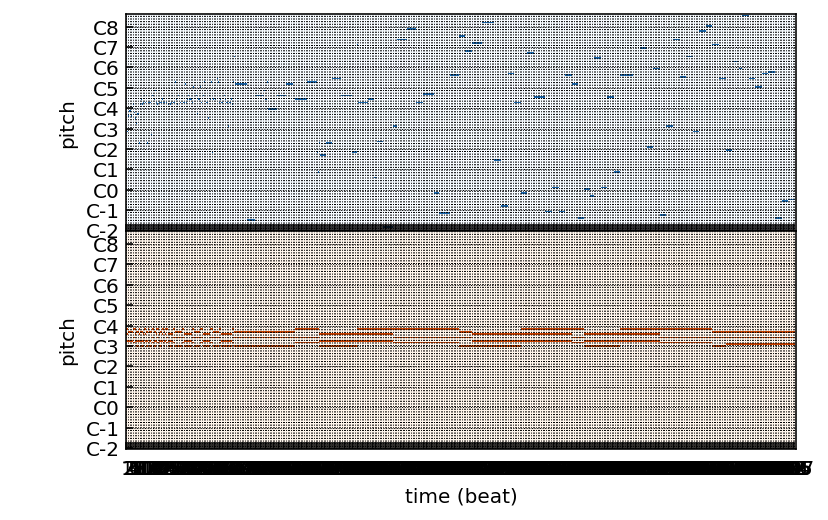

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_n_nicki-minaj_va-va-voom_verse-and-pre-chorus_chorus_bridge_eva.mid


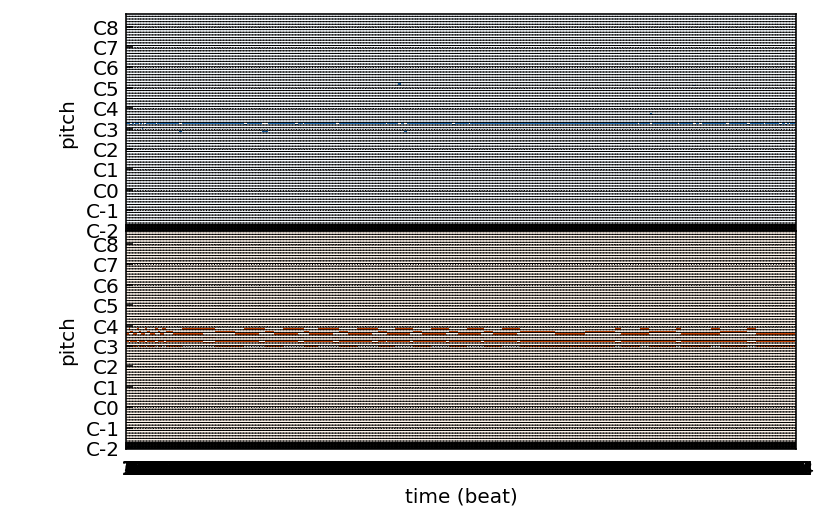

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


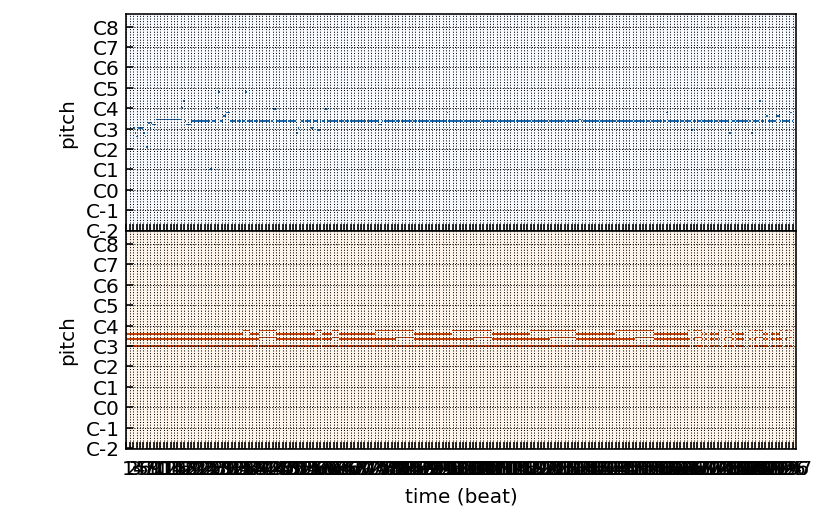

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_d_deadmau5_october_chorus_eva.mid


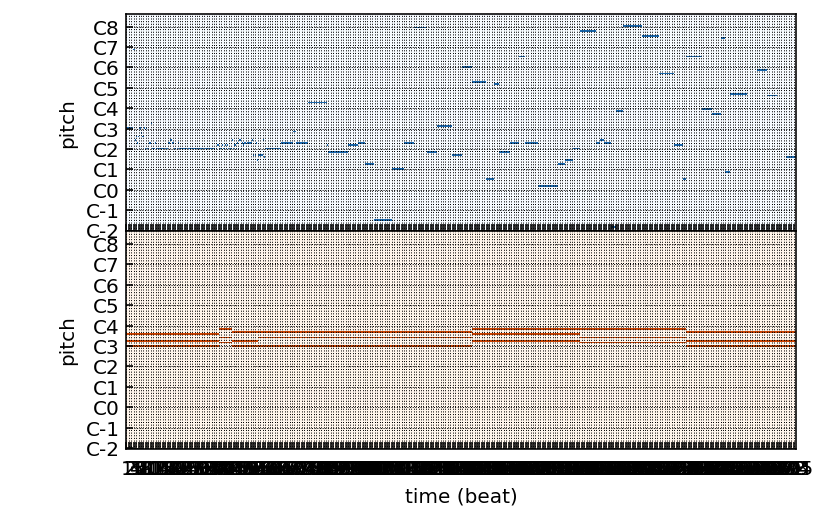

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_a_aylictal_suite-3_instrumental_eva.mid


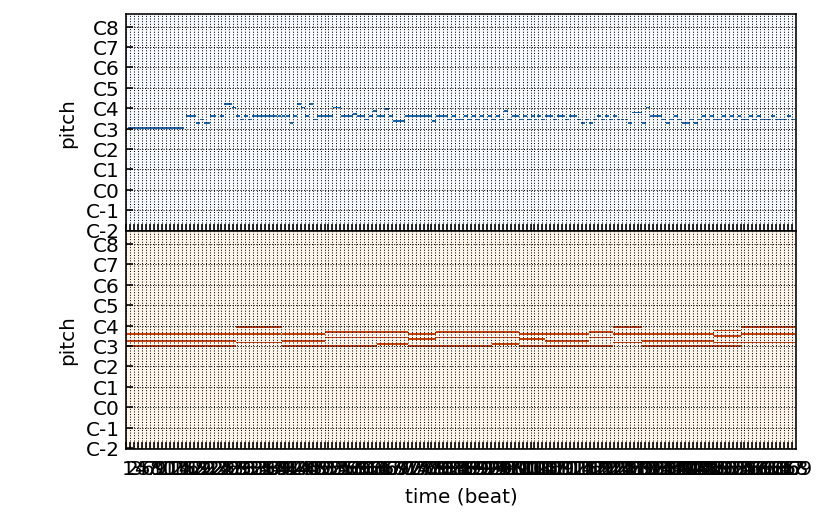

long pattern exists test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_01_Electronic_bar_note_120000_8_0.6_0.6_l_lady-gaga_scheisse_verse_pre-chorus_chorus-lead-out_eva.mid


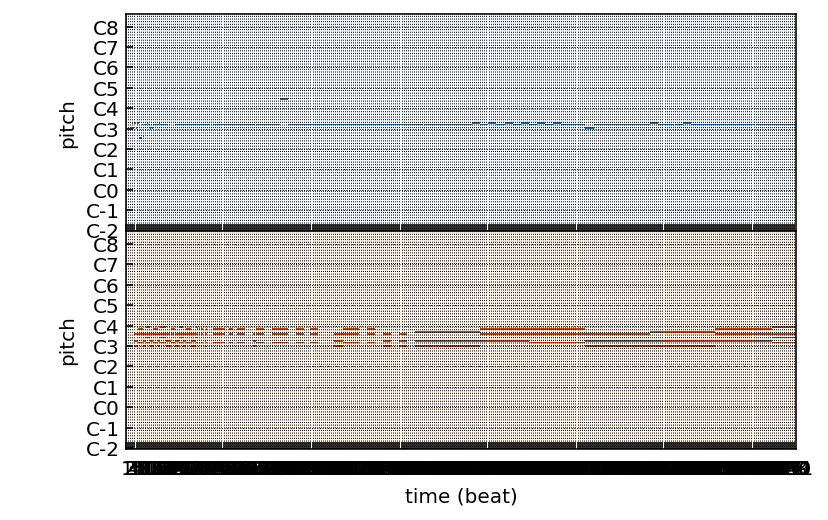

long pattern exists test/generated_result/10_27_2020_03_04_51_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_51_Electronic_bar_note_120000_8_0.6_0.6_j_jean-jacques-perrey_brazilian-flower_chorus_bridge_eva.mid


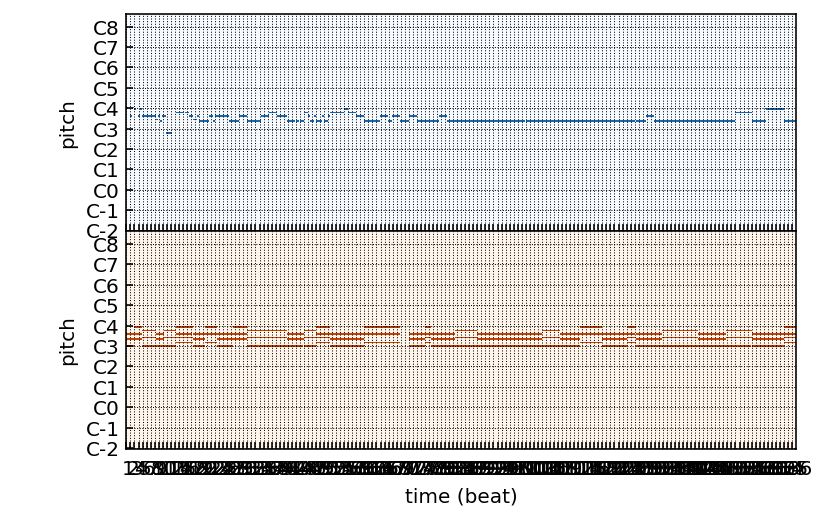

long pattern exists test/generated_result/10_27_2020_03_04_51_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_51_Electronic_bar_note_120000_8_0.6_0.6_n_nicki-minaj_va-va-voom_verse-and-pre-chorus_chorus_bridge_eva.mid


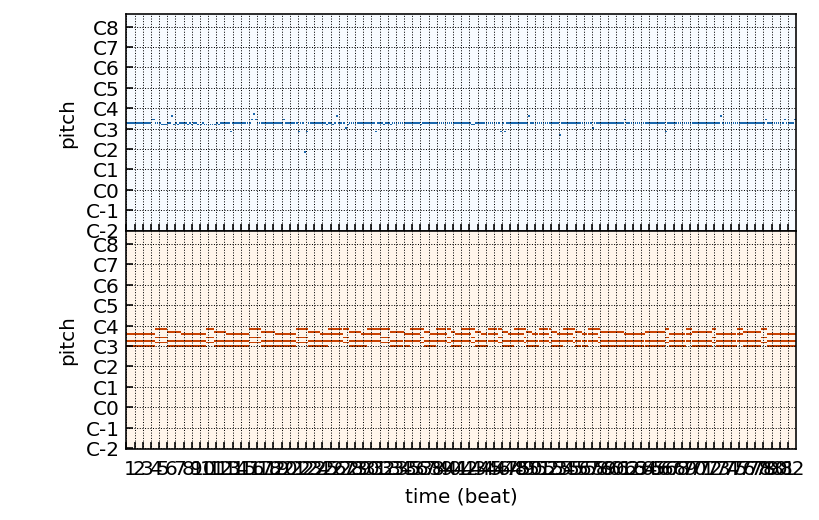

long pattern exists test/generated_result/10_27_2020_03_04_51_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_51_Electronic_bar_note_120000_8_0.6_0.6_t_tristam_my-friend_pre-chorus_chorus_bridge_eva.mid


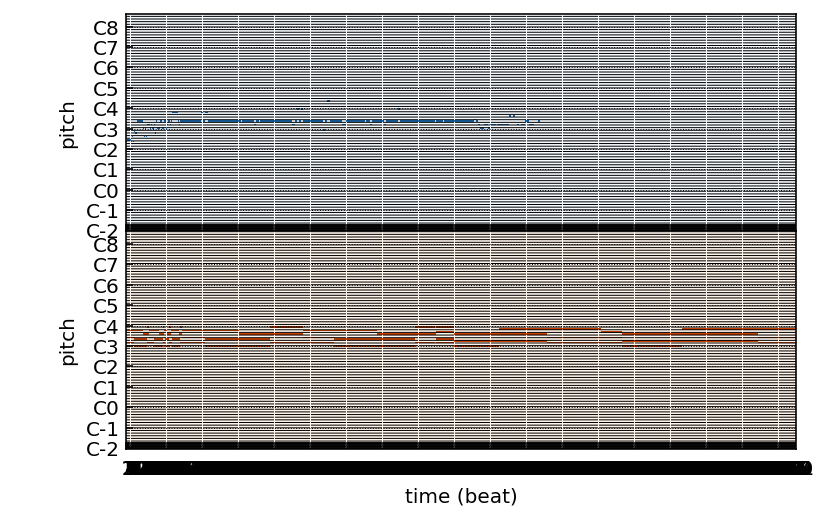

long pattern exists test/generated_result/10_27_2020_03_04_51_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_04_51_Electronic_bar_note_120000_8_0.6_0.6_c_charli-xcx_femmebot-ft-dorian-electra-and-mykki-blanco_chorus_eva.mid


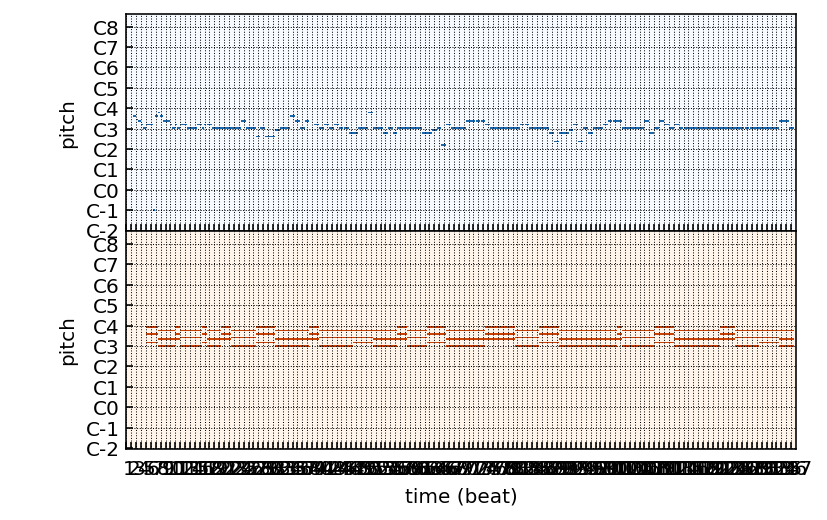

long pattern exists test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_05_21_Electronic_bar_note_120000_8_0.6_0.6_t_tristam_my-friend_pre-chorus_chorus_bridge_eva.mid


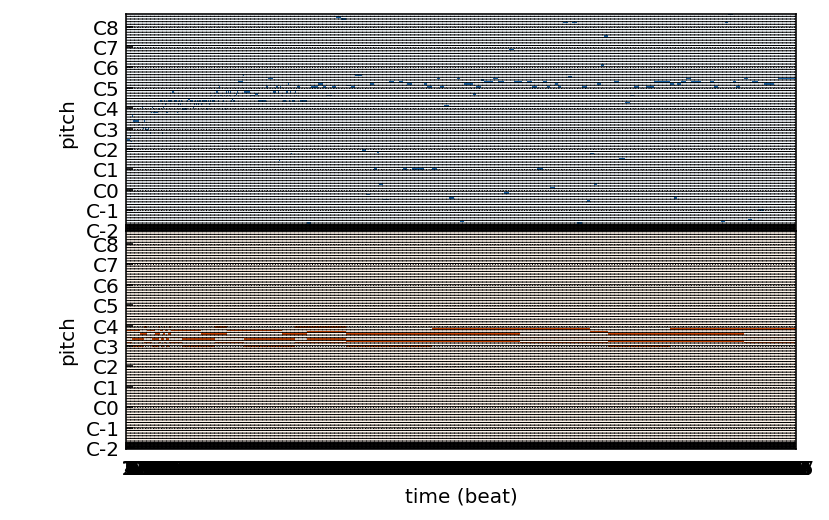

long pattern exists test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_05_21_Electronic_bar_note_120000_8_0.6_0.6_n_nicki-minaj_va-va-voom_verse-and-pre-chorus_chorus_bridge_eva.mid


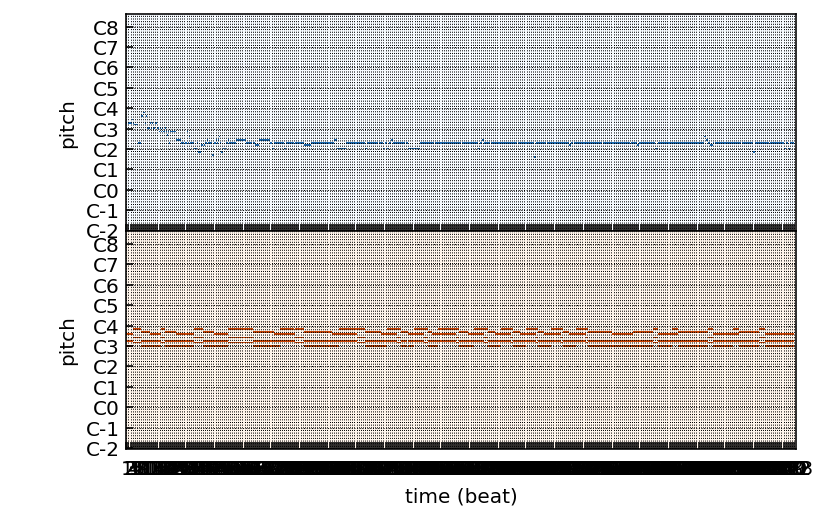

long pattern exists test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_05_21_Electronic_bar_note_120000_8_0.6_0.6_m_michael-walthius_dreaming-in-stereo---under-the-moon_pre-chorus_chorus_solo_instrumental_eva.mid


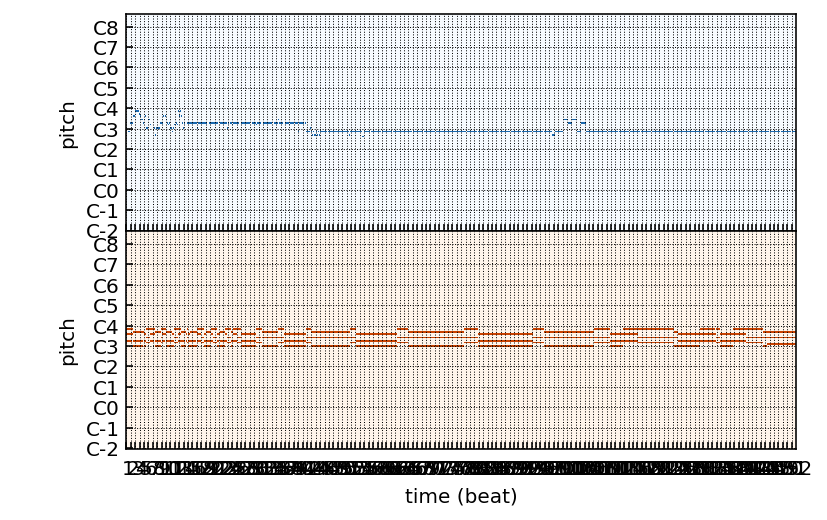

long pattern exists test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_05_21_Electronic_bar_note_120000_8_0.6_0.6_l_lindsey-stirling_beyond-the-veil_intro-and-verse_eva.mid


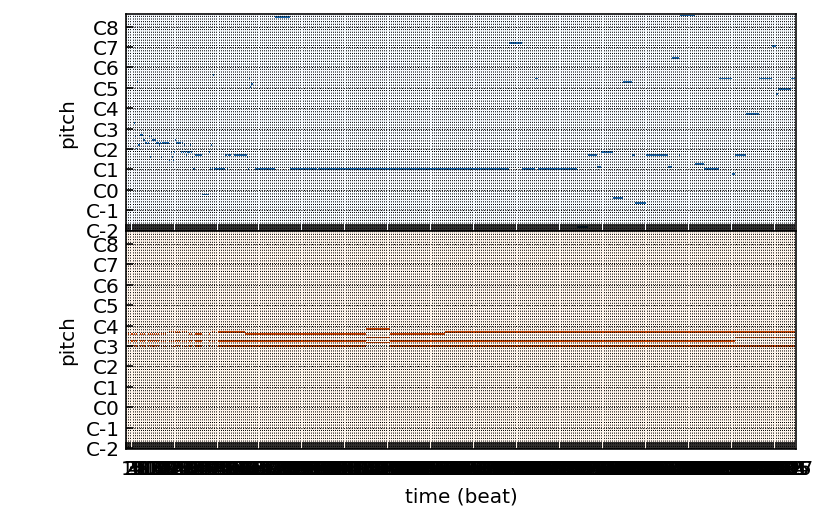

long pattern exists test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6/10_27_2020_03_05_21_Electronic_bar_note_120000_8_0.6_0.6_j_john-martin_anywhere-for-you_intro_verse_chorus_eva.mid


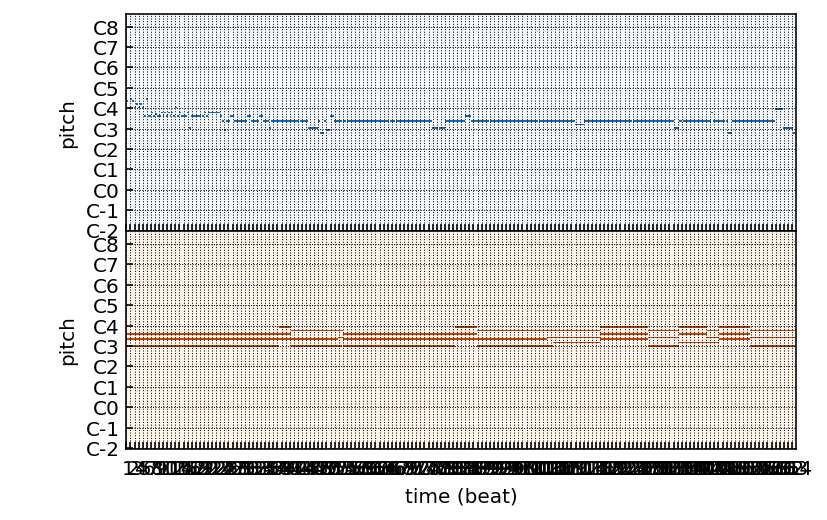

In [5]:
#folders_2b_evalutated = ["./test/generated_result/10_26_2020_11_14_22_Electronic_note/120000/8/0.7_0.8", "test/generated_result/10_24_2020_13_39_33_Electronic_nosamplernn/120000/16/0.6_0.6"]
folders_2b_evaluated = ["test/generated_result/10_27_2020_03_04_01_Electronic_bar_note/120000/8/0.6_0.6",
                       "test/generated_result/10_27_2020_03_04_51_Electronic_bar_note/120000/8/0.6_0.6",
                       "test/generated_result/10_27_2020_03_05_21_Electronic_bar_note/120000/8/0.6_0.6"]
for folder in folders_2b_evaluated:

    mid_files_lst = glob.glob(folder+"/*.mid")
    #mid_files_lst2 = glob.glob(folder+"/*.mid")
    mid_files_lst2 = [f for f in mid_files_lst if f.split("_")[-1]=="eva.mid"]

    #evaluate a folder of files
    feature_4_each_file = [get_feature(mid_file, long_short_threshold= 64) for mid_file in mid_files_lst2]
    ratio_4_folder = sum([x[0]for x in feature_4_each_file])/len(mid_files_lst2)
    long_patterns_4_folder = sum([x[1]for x in feature_4_each_file])
    short_patterns_4_folder = sum([x[2]for x in feature_4_each_file])
    mask_lst = [x[3] for x in feature_4_each_file]
    files_with_long_pattern = [x for x, y in zip(mid_files_lst, mask_lst) if y is True]

    logdir = folder.split("/")[-4]
    ckpt = folder.split("/")[-3]
    note_tmp = folder.split("/")[-1].split("_")[0]
    rhythm_tmp = note_tmp = folder.split("/")[-1].split("_")[1]
    folder_name = folder.replace("/","_")
    txt_name = "_".join(folder_name.split("_")[3:])+".txt"
    with open("test/generated_result"+txt_name, "w") as damn:
        damn.write("logdir:{}\n".format(logdir))
        damn.write("ckpt:{}\n".format(ckpt))
        damn.write("note tmp:{}\n".format(note_tmp))
        damn.write("rhythm tmp:{}\n".format(rhythm_tmp))
        damn.write("ratio:{}\n".format(ratio_4_folder))
        damn.write("long pattern:{}\n".format(long_patterns_4_folder))
        damn.write("short pattern:{}\n".format(short_patterns_4_folder))
    #print(folder,"ratio:",ratio_4_folder, "long pattern:",long_patterns_4_folder, "short pattern:",short_patterns_4_folder, "files_with_long_pattern", files_with_long_pattern)

long pattern exists test/generated_result/10_26_2020_11_11_32_Electronic_note/120000/8/0.6_0.6/10_26_2020_11_11_32_Electronic_note_120000_8_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


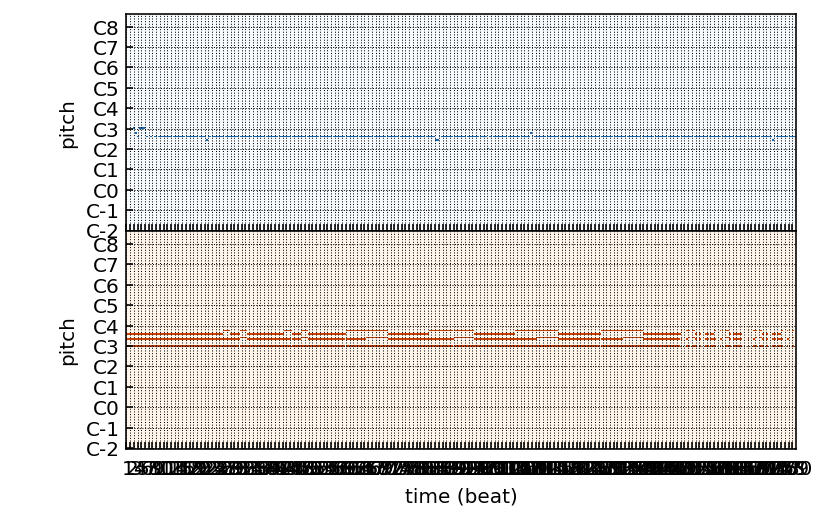

long pattern exists test/generated_result/10_26_2020_11_11_32_Electronic_note/120000/8/0.6_0.6/10_26_2020_11_11_32_Electronic_note_120000_8_0.6_0.6_t_tristam_my-friend_pre-chorus_chorus_bridge_eva.mid


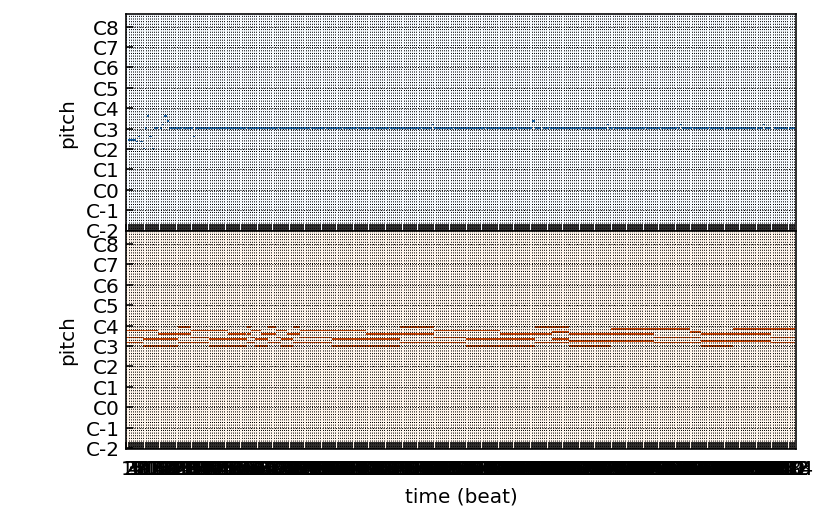

long pattern exists test/generated_result/10_26_2020_11_12_09_Electronic_note/120000/8/0.6_0.6/10_26_2020_11_12_09_Electronic_note_120000_8_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


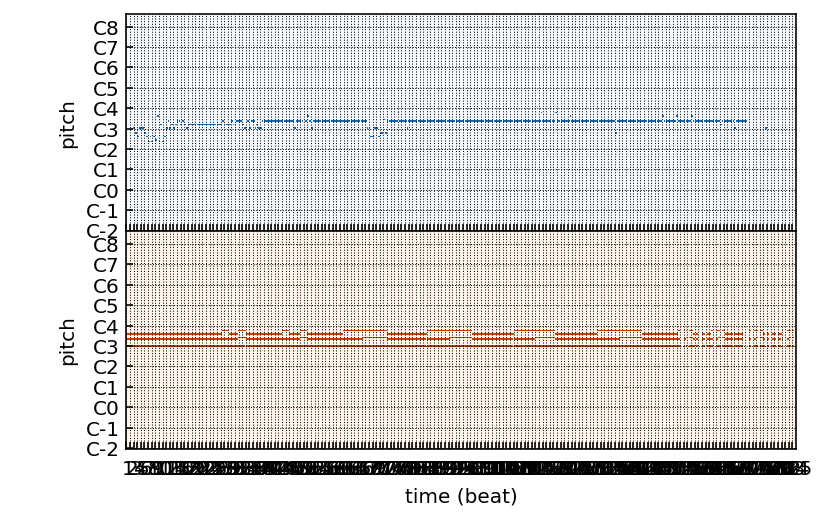

long pattern exists test/generated_result/10_26_2020_11_14_22_Electronic_note/120000/8/0.6_0.6/10_26_2020_11_14_22_Electronic_note_120000_8_0.6_0.6_m_michael-walthius_dreaming-in-stereo---under-the-moon_pre-chorus_chorus_solo_instrumental_eva.mid


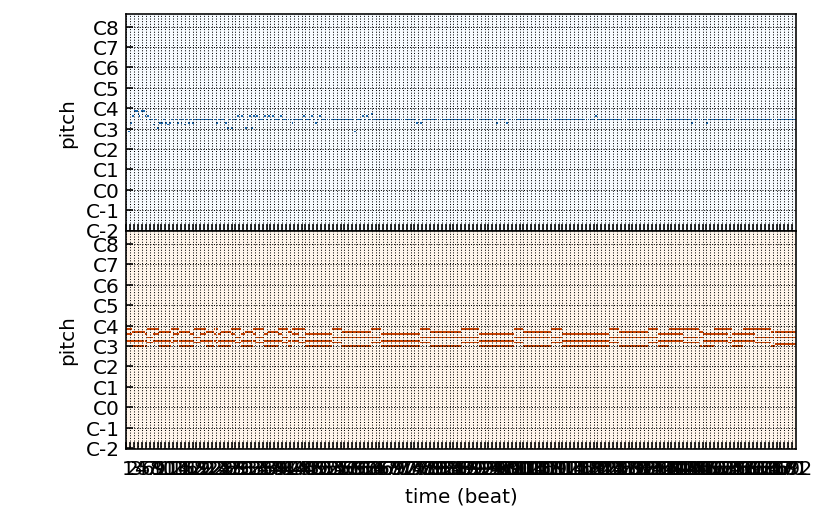

long pattern exists test/generated_result/10_26_2020_11_14_22_Electronic_note/120000/8/0.6_0.6/10_26_2020_11_14_22_Electronic_note_120000_8_0.6_0.6_t_the-chainsmokers_roses-ft-rozes_verse_pre-chorus_chorus_eva.mid


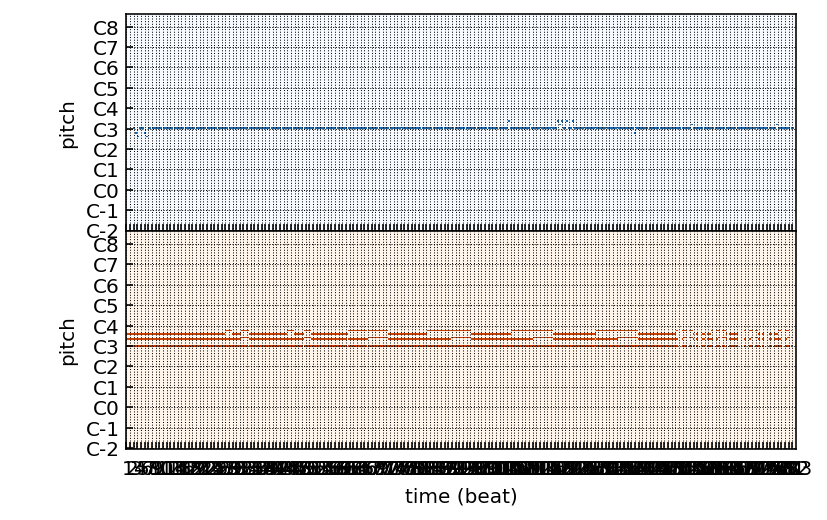

In [3]:

folders_2b_evaluated = ["test/generated_result/10_26_2020_11_11_32_Electronic_note/120000/8/0.6_0.6",
                       "test/generated_result/10_26_2020_11_12_09_Electronic_note/120000/8/0.6_0.6",
                       "test/generated_result/10_26_2020_11_14_22_Electronic_note/120000/8/0.6_0.6"]
for folder in folders_2b_evaluated:

    mid_files_lst = glob.glob(folder+"/*.mid")
    #mid_files_lst2 = glob.glob(folder+"/*.mid")
    mid_files_lst2 = [f for f in mid_files_lst if f.split("_")[-1]=="eva.mid"]

    #evaluate a folder of files
    feature_4_each_file = [get_feature(mid_file, long_short_threshold= 64) for mid_file in mid_files_lst2]
    ratio_4_folder = sum([x[0]for x in feature_4_each_file])/len(mid_files_lst2)
    long_patterns_4_folder = sum([x[1]for x in feature_4_each_file])
    short_patterns_4_folder = sum([x[2]for x in feature_4_each_file])
    mask_lst = [x[3] for x in feature_4_each_file]
    files_with_long_pattern = [x for x, y in zip(mid_files_lst, mask_lst) if y is True]

    logdir = folder.split("/")[-4]
    ckpt = folder.split("/")[-3]
    note_tmp = folder.split("/")[-1].split("_")[0]
    rhythm_tmp = note_tmp = folder.split("/")[-1].split("_")[1]
    folder_name = folder.replace("/","_")
    txt_name = "_".join(folder_name.split("_")[3:])+".txt"
    with open("test/generated_result"+txt_name, "w") as damn:
        damn.write("logdir:{}\n".format(logdir))
        damn.write("ckpt:{}\n".format(ckpt))
        damn.write("note tmp:{}\n".format(note_tmp))
        damn.write("rhythm tmp:{}\n".format(rhythm_tmp))
        damn.write("ratio:{}\n".format(ratio_4_folder))
        damn.write("long pattern:{}\n".format(long_patterns_4_folder))
        damn.write("short pattern:{}\n".format(short_patterns_4_folder))